In [216]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\sw.shin\Downloads\02_TIGER200.xlsx', index_col=0)
df

,TIGER 200
D A T E,
2013-12-30,26670.0
2014-01-02,25975.0
2014-01-03,25705.0
2014-01-06,25760.0
2014-01-07,25855.0
...,...
2019-12-03,27665.0
2019-12-04,27490.0
2019-12-05,27420.0


In [217]:
X=10
Y=25

In [218]:
df['MA'+str(X)]=df['TIGER 200'].rolling(window=X).mean()
df['MA'+str(Y)]=df['TIGER 200'].rolling(window=Y).mean()
df

,TIGER 200,MA10,MA25
D A T E,,,
2013-12-30,26670.0,NaN,NaN
2014-01-02,25975.0,NaN,NaN
2014-01-03,25705.0,NaN,NaN
2014-01-06,25760.0,NaN,NaN
2014-01-07,25855.0,NaN,NaN
...,...,...,...
2019-12-03,27665.0,28042.5,28190.0
2019-12-04,27490.0,27964.0,28186.6
2019-12-05,27420.0,27920.0,28177.0


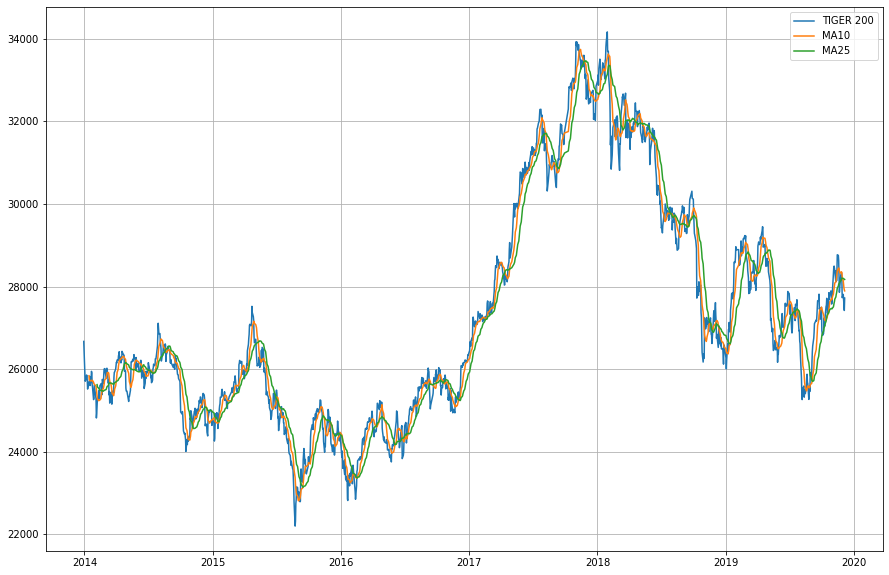

In [219]:
plt.figure(figsize=(15,10))
plt.plot(df.index, df['TIGER 200'], label='TIGER 200')
plt.plot(df.index, df['MA'+str(X)], label='MA'+str(X))
plt.plot(df.index, df['MA'+str(Y)], label='MA'+str(Y))
plt.legend()
plt.grid()
plt.show()

In [220]:
# 매수신호, 매도신호 입력
df2=df[Y-1:-1]
df2['매수신호']='No'
df2['매도신호']='No'
df2['보유여부']='No'
for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]<df2.loc[df2.index[i-1],'MA'+str(Y)]:
        if df2.loc[df2.index[i],'MA'+str(X)]>df2.loc[df2.index[i],'MA'+str(Y)]: #상방 돌파신호
            df2.loc[df2.index[i], '매수신호']='Yes'

for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]>df2.loc[df2.index[i-1],'MA'+str(Y)]:
        if df2.loc[df2.index[i],'MA'+str(X)]<df2.loc[df2.index[i],'MA'+str(Y)]: #하방 돌파신호
            df2.loc[df2.index[i], '매도신호']='Yes'
            
df2.head()

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning

,TIGER 200,MA10,MA25,매수신호,매도신호,보유여부
D A T E,,,,,,
2014-02-06,25110.0,25337.0,25623.0,No,No,No
2014-02-07,25300.0,25276.5,25568.2,No,No,No
2014-02-10,25290.0,25244.0,25540.8,No,No,No
2014-02-11,25430.0,25231.5,25529.8,No,No,No
2014-02-12,25485.0,25254.0,25518.8,No,No,No


In [222]:
for i in range(1,(len(df2))):
    if df2.loc[df2.index[i],'매수신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='TIGER 200'
    elif df2.loc[df2.index[i],'매도신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='현금'
    else:
        if df2.loc[df2.index[i-1],'보유여부']=='TIGER 200':
            df2.loc[df2.index[i],'보유여부']='TIGER 200'
        elif df2.loc[df2.index[i-1],'보유여부']=='현금':
            df2.loc[df2.index[i],'보유여부']='현금'
df2.head(50)

,TIGER 200,MA10,MA25,매수신호,매도신호,보유여부
D A T E,,,,,,
2014-02-06,25110.0,25337.0,25623.0,No,No,No
2014-02-07,25300.0,25276.5,25568.2,No,No,No
2014-02-10,25290.0,25244.0,25540.8,No,No,No
2014-02-11,25430.0,25231.5,25529.8,No,No,No
2014-02-12,25485.0,25254.0,25518.8,No,No,No
2014-02-13,25270.0,25251.0,25495.4,No,No,No
2014-02-14,25600.0,25250.0,25485.6,No,No,No
2014-02-17,25630.0,25285.5,25481.6,No,No,No
2014-02-18,25650.0,25369.0,25487.0,No,No,No


In [224]:
# 일간 수익률 입력
df2['daily TIGER 200 return']=df2['TIGER 200'].pct_change()
df2.head(30)

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TIGER 200,MA10,MA25,매수신호,매도신호,보유여부,daily TIGER 200 return
D A T E,,,,,,,
2014-02-06,25110.0,25337.0,25623.0,No,No,No,NaN
2014-02-07,25300.0,25276.5,25568.2,No,No,No,0.007567
2014-02-10,25290.0,25244.0,25540.8,No,No,No,-0.000395
2014-02-11,25430.0,25231.5,25529.8,No,No,No,0.005536
2014-02-12,25485.0,25254.0,25518.8,No,No,No,0.002163
2014-02-13,25270.0,25251.0,25495.4,No,No,No,-0.008436
2014-02-14,25600.0,25250.0,25485.6,No,No,No,0.013059
2014-02-17,25630.0,25285.5,25481.6,No,No,No,0.001172
2014-02-18,25650.0,25369.0,25487.0,No,No,No,0.000780


In [209]:
start=[]
for i in range(len(df2)):
    if df2.loc[df2.index[i-1],'매수신호']=='No':
        if df2.loc[df2.index[i],'매수신호']=='Yes':
            start.append(i)
start[0]

11

In [227]:
# 포트폴리오 구성
df2['Portfolio']=0
df2.loc[df2.index[0:start[0]+1], 'Portfolio']=1000000
df2

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TIGER 200,MA10,MA25,매수신호,매도신호,보유여부,daily TIGER 200 return,Portfolio
D A T E,,,,,,,,
2014-02-06,25110.0,25337.0,25623.0,No,No,No,NaN,1000000
2014-02-07,25300.0,25276.5,25568.2,No,No,No,0.007567,1000000
2014-02-10,25290.0,25244.0,25540.8,No,No,No,-0.000395,1000000
2014-02-11,25430.0,25231.5,25529.8,No,No,No,0.005536,1000000
2014-02-12,25485.0,25254.0,25518.8,No,No,No,0.002163,1000000
...,...,...,...,...,...,...,...,...
2019-12-02,27810.0,28138.5,28196.8,No,Yes,현금,0.002885,0
2019-12-03,27665.0,28042.5,28190.0,No,No,현금,-0.005214,0
2019-12-04,27490.0,27964.0,28186.6,No,No,현금,-0.006326,0


In [228]:
# 포트폴리오 운용
# TIGER 200 보유중일땐, 다음날부터 수익률에 영향을 받음.
# 현금 보유중일 땐 다음날부터 포트폴리오 그대로.
for i in range(start[0],len(df2)-1):
    if df2.loc[df2.index[i],'보유여부']=='TIGER 200':
        df2.loc[df2.index[i+1], 'Portfolio']=(1+df2.loc[df2.index[i+1],'daily TIGER 200 return'])*df2.loc[df2.index[i],'Portfolio']
    elif df2.loc[df2.index[i],'보유여부']=='현금':
        df2.loc[df2.index[i+1],'Portfolio']=df2.loc[df2.index[i],'Portfolio']

df2.head(30)

,TIGER 200,MA10,MA25,매수신호,매도신호,보유여부,daily TIGER 200 return,Portfolio
D A T E,,,,,,,,
2014-02-06,25110.0,25337.0,25623.0,No,No,No,NaN,1.000000e+06
2014-02-07,25300.0,25276.5,25568.2,No,No,No,0.007567,1.000000e+06
2014-02-10,25290.0,25244.0,25540.8,No,No,No,-0.000395,1.000000e+06
2014-02-11,25430.0,25231.5,25529.8,No,No,No,0.005536,1.000000e+06
2014-02-12,25485.0,25254.0,25518.8,No,No,No,0.002163,1.000000e+06
2014-02-13,25270.0,25251.0,25495.4,No,No,No,-0.008436,1.000000e+06
2014-02-14,25600.0,25250.0,25485.6,No,No,No,0.013059,1.000000e+06
2014-02-17,25630.0,25285.5,25481.6,No,No,No,0.001172,1.000000e+06
2014-02-18,25650.0,25369.0,25487.0,No,No,No,0.000780,1.000000e+06


C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


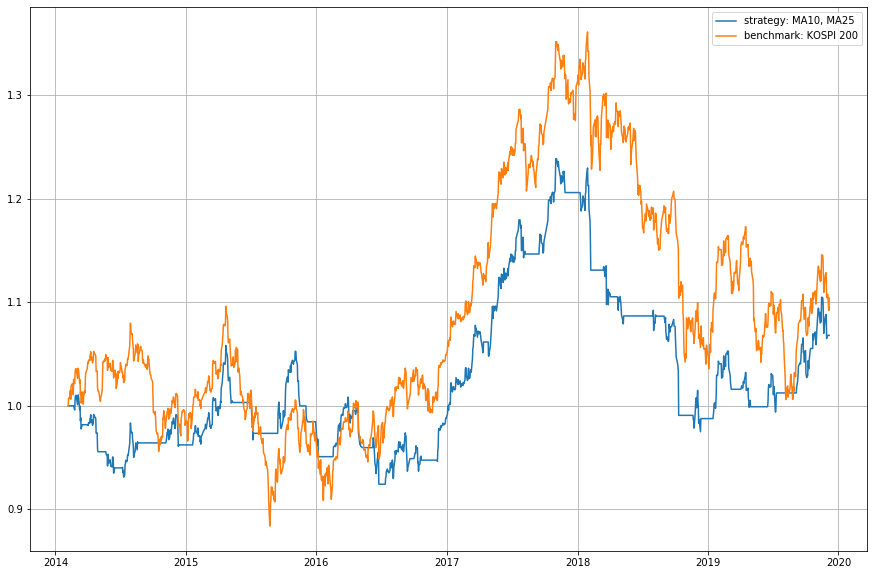

In [229]:
df2['benchmark']=df2['TIGER 200']/df2.loc[df2.index[0],'TIGER 200']
strategy=df2['Portfolio']/df2.loc[df2.index[0],'Portfolio']
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(strategy, label='strategy: MA'+str(X)+', MA'+str(Y))
plt.plot(df2['benchmark'], label='benchmark: KOSPI 200')
plt.legend()

In [230]:
df2

,TIGER 200,MA10,MA25,매수신호,매도신호,보유여부,daily TIGER 200 return,Portfolio,benchmark
D A T E,,,,,,,,,
2014-02-06,25110.0,25337.0,25623.0,No,No,No,NaN,1.000000e+06,1.000000
2014-02-07,25300.0,25276.5,25568.2,No,No,No,0.007567,1.000000e+06,1.007567
2014-02-10,25290.0,25244.0,25540.8,No,No,No,-0.000395,1.000000e+06,1.007168
2014-02-11,25430.0,25231.5,25529.8,No,No,No,0.005536,1.000000e+06,1.012744
2014-02-12,25485.0,25254.0,25518.8,No,No,No,0.002163,1.000000e+06,1.014934
...,...,...,...,...,...,...,...,...,...
2019-12-02,27810.0,28138.5,28196.8,No,Yes,현금,0.002885,1.067993e+06,1.107527
2019-12-03,27665.0,28042.5,28190.0,No,No,현금,-0.005214,1.067993e+06,1.101752
2019-12-04,27490.0,27964.0,28186.6,No,No,현금,-0.006326,1.067993e+06,1.094783


In [233]:
print('total return of strategy :'+ str(df2.iloc[-1,7]/df2.iloc[1,7]))

total return of strategy :1.067992802012015


In [232]:
print('total return of KOSPI 200 :'+ str(df2.iloc[-1,8]/df2.iloc[1,8]))

total return of KOSPI 200 :1.0956521739130434


In [234]:
df2.iloc[-1,7]/df2.iloc[1,7]

1.067992802012015

In [191]:
df2.iloc[-1]

TIGER 200            27720
MA10               27894.5
MA25               28171.6
매수신호                    No
매도신호                    No
돌파                   277.1
daily return     0.0109409
Portfolio       1.0645e+06
benchmark          1.10394
Name: 2019-12-06 00:00:00, dtype: object